# Diffusion Coefficients (DC) Modeling

Before forward simulation analysis, an initial modeling of diffusion coefficients is required.
It is recommend to perform data smoothing before DC modeling.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pydiffusion.io import read_csv, save_csv
from pydiffusion.plot import profileplot, DCplot, SFplot
from pydiffusion.Dmodel import Dmodel

## Read smoothed profile data
Read smoothed profile data of Ni-Mo 1100C 1000 hours.

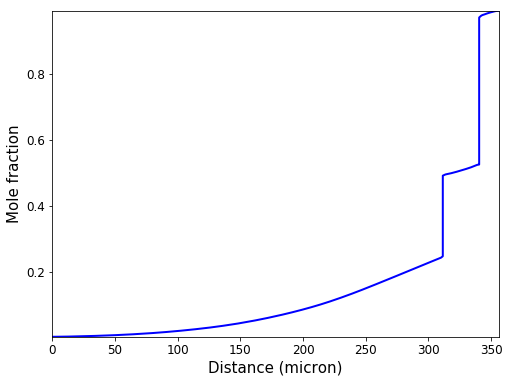

In [2]:
NiMo_sm, _ = read_csv('NiMo_sm.csv')

ax = plt.figure(figsize=(8, 6)).add_subplot(111)
profileplot(NiMo_sm, ax)
plt.show()

## Modeling using Dmodel function

Time in seconds is required as input. Because this example is using inline graphical setting, we set parameter **gui**=False. It is recommended to use **gui**=True for any non-inline graphic setting, in which points can be selected manually in figures.

At first, the function asks using whether **Spline** or **UnivariateSpline**:

**Spline**: Need to select points as reference points for spline fitting. Can use both **Per-Point Mode** and **Whole-Phase Mode** in the following forward simulation analysis (FSA).

**UnivariateSpline**: Need to select range for reliable data fitting. Can only use **Whole-Phase Mode** in the following FSA.

(Please see definitions of **Per-Point Mode** and **Whole-Phase Mode** in FSA example)

Then the function will ask you enter the points for selected method modeling.

In this example, we are using **Spline** method for all of 3 phases.

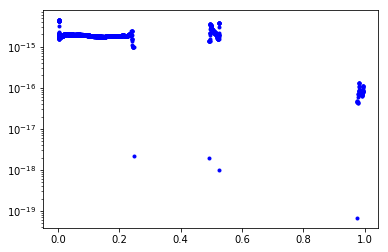

Use Spline (y) or UnivariateSpline (n) to model diffusion coefficients? [y]



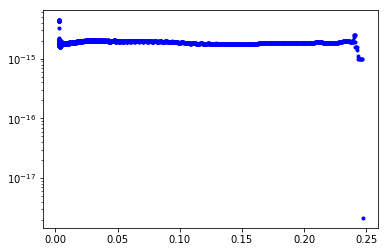

# of spline points: 1 (constant), 2 (linear), >2 (spline)
Input reference locations for spline function
.05 .2


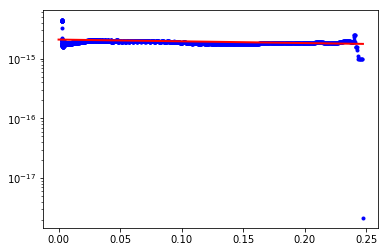

Continue to next phase? [y]


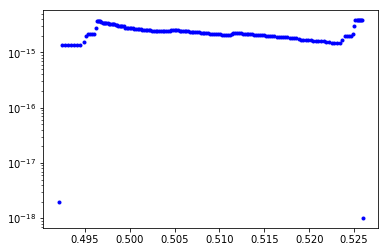

# of spline points: 1 (constant), 2 (linear), >2 (spline)
Input reference locations for spline function
.5 .515


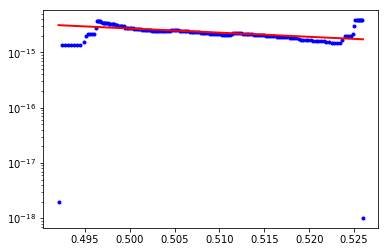

Continue to next phase? [y]


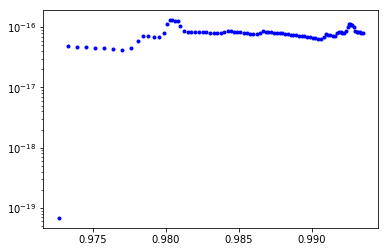

# of spline points: 1 (constant), 2 (linear), >2 (spline)
Input reference locations for spline function
.985


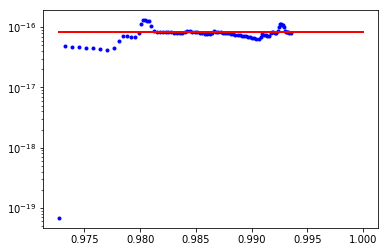

Continue to next phase? [y]


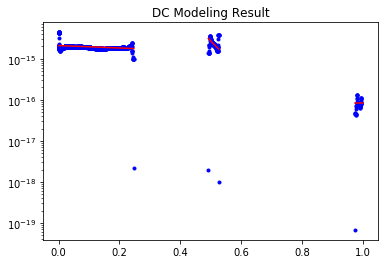

In [3]:
time = 1000 * 3600
diffsys_init = Dmodel(NiMo_sm, time, Xlim=[0, 1], gui=False)

## Plot and save the result

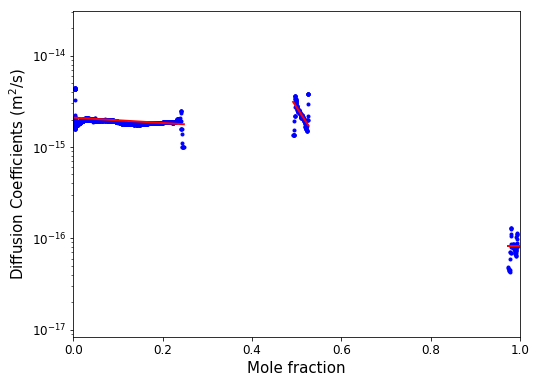

In [4]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111)

SFplot(NiMo_sm, time, Xlim=[0, 1], ax=ax)
DCplot(diffsys_init, ax, c='r')
plt.show()

In [5]:
save_csv('NiMo_DC_init.csv', profile=NiMo_sm, diffsys=diffsys_init)